In [194]:
import sys
import os.path as path
import math
import matplotlib.pyplot as plt
import numpy as np
import importlib

sys.path.append("..")
from core import *

import gasnace_swieczki as gs
importlib.reload(gs)
from gasnace_swieczki import *

FIG_SIZE = (6, 5)
DPI = 100

## Gasnące Świeczki

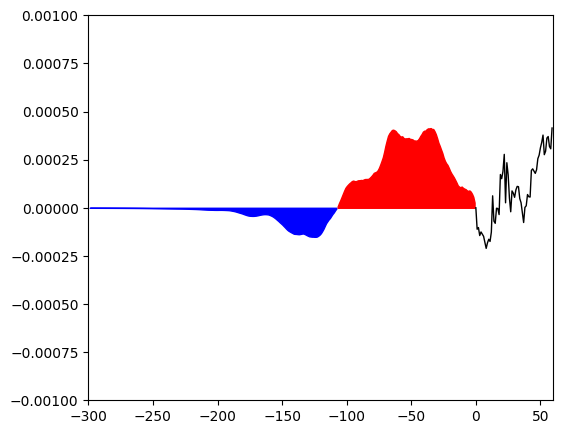

In [193]:
gs.CURRENT_RANGE = 5 * 60
gs.FUTURE_RANGE = 1 * 60
gs.Y_RANGE = [-1e-3, 1e-3] 
gs.FILTERED_VALUE = Savgol_filter(window=50, order=5).filter(VALUE)
gs.ZANIK = FiltrK(tau=100, exp=2)

plt.figure(figsize=(FIG_SIZE), dpi=DPI)
PlotBoth(time_start=300, plotter=plt, axis_off=False).plot()
plt.show()

In [195]:
STEP = 20
N = 10

for start_time in [i * STEP for i in range(N)]:
    save(start_time)

## %%%%%%%%%%%%%%%%%

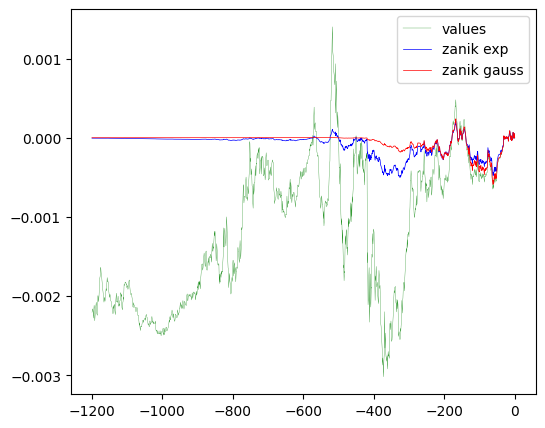

In [158]:
shift = 60
value = VALUE[0 + shift: 1200 + shift]
value = value - value[-1]
time_count = np.array([i for i in range(len(value))], dtype='float64')
time_count = time_count - time_count[-1]

zanik_gauss = np.array([value[i] * GaussQuench(tau=200).quench(time_count[i]) for i in range(len(time_count))])
zanik_exp = np.array([value[i] * ExpQuench(tau=200).quench(time_count[i]) for i in range(len(time_count))])

plt.figure(figsize=(FIG_SIZE), dpi=DPI)
plt.plot(time_count, value, label='values', color='green', linewidth=0.2)
plt.plot(time_count, zanik_exp, label='zanik exp', color='blue', linewidth=0.5)
plt.plot(time_count, zanik_gauss, label='zanik gauss', color='red', linewidth=0.5)
plt.legend()
plt.show()


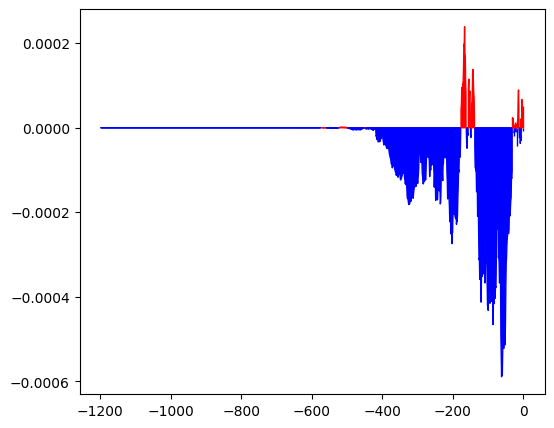

In [159]:
plt.figure(figsize=(FIG_SIZE), dpi=DPI)
plt.plot(time_count, zanik_gauss, color='black', linewidth=0.0)
plt.fill_between(time_count, zanik_gauss, where=((zanik_gauss < 0)), color='blue')
plt.fill_between(time_count, zanik_gauss, where=((zanik_gauss > 0)), color='red')

plt.show()